# References

In [11]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
#sys.path.append('../fastai/old/') #fastai version 0.7
sys.path.append('../fastai/') #fastai version 1

from fastai import *
from fastai.vision import *

import pdb
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from glob import glob
import png
from tqdm import tqdm_notebook as tqdm

In [12]:
torch.cuda.set_device(1)
torch.backends.cudnn.benchmark=True

# Global Variables

In [13]:
DP = Path('/home/Deep_Learner/work/datasets/human-protein-atlas-image-classification/')
STAGE_ONE_DATA = DP/'stage1_data'
TRAIN_PNGS = 'train_pngs'
TRAIN_LABELS = 'labels.csv'
TEST_PNGS = 'test_pngs'

SUBMISSIONS = DP/'submissions'
SUBMISSIONS.mkdir(exist_ok=True)


filter_colors = ['blue', 'green', 'red', 'yellow']

IdToCatDict = {0:'Nucleoplasm',
               1:'Nuclear_membrane',
               2:'Nucleoli',
               3:'Nucleoli_fibrillar_center',
               4:'Nuclear_speckles',
               5:'Nuclear_bodies',
               6:'Endoplasmic_reticulum',
               7:'Golgi_apparatus',
               8:'Peroxisomes',
               9:'Endosomes',
               10:'Lysosomes',
               11:'Intermediate_filaments',
               12:'Actin_filaments',
               13:'Focal_adhesion_sites',
               14:'Microtubules',
               15:'Microtubule_ends',
               16:'Cytokinetic_bridge',
               17:'Mitotic_spindle',
               18:'Microtubule_organizing_center',
               19:'Centrosome',
               20:'Lipid_droplets',
               21:'Plasma_membrane',
               22:'Cell_junctions',
               23:'Mitochondria',
               24:'Aggresome',
               25:'Cytosol',
               26:'Cytoplasmic_bodies',
               27:'Rods_&_rings'}

sz = 128
bs = 64

# Data Setup

In [14]:
if os.path.isfile(STAGE_ONE_DATA/TRAIN_LABELS):
    trainFns_df = pd.read_csv(STAGE_ONE_DATA/TRAIN_LABELS)

else:
    trainIds_df = pd.read_csv(DP/'train.csv')
    trainFns_df = pd.DataFrame(columns=['name','label'])
    
    for index, row in tqdm(trainIds_df.iterrows(), total=trainIds_df.shape[0]):
        bn = row['Id']
        cats = row['Target']
        for c in filter_colors:
            fn = f'{bn}_{c}'
            trainFns_df = trainFns_df.append({'name': fn, 'label': cats}, ignore_index=True)
            
    trainFns_df.to_csv(STAGE_ONE_DATA/TRAIN_LABELS, index=False)


trainFns_df.head()

,name,label
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue,16 0
1,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green,16 0
2,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red,16 0
3,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow,16 0
4,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue,7 1 2 0


In [15]:
trainFns_df.shape


(124288, 2)

In [16]:
tfms = get_transforms(flip_vert=True)
stage1_data = ImageDataBunch.from_csv(path=STAGE_ONE_DATA, folder=TRAIN_PNGS, suffix='.png', test=TEST_PNGS, ds_tfms=tfms, size=sz)

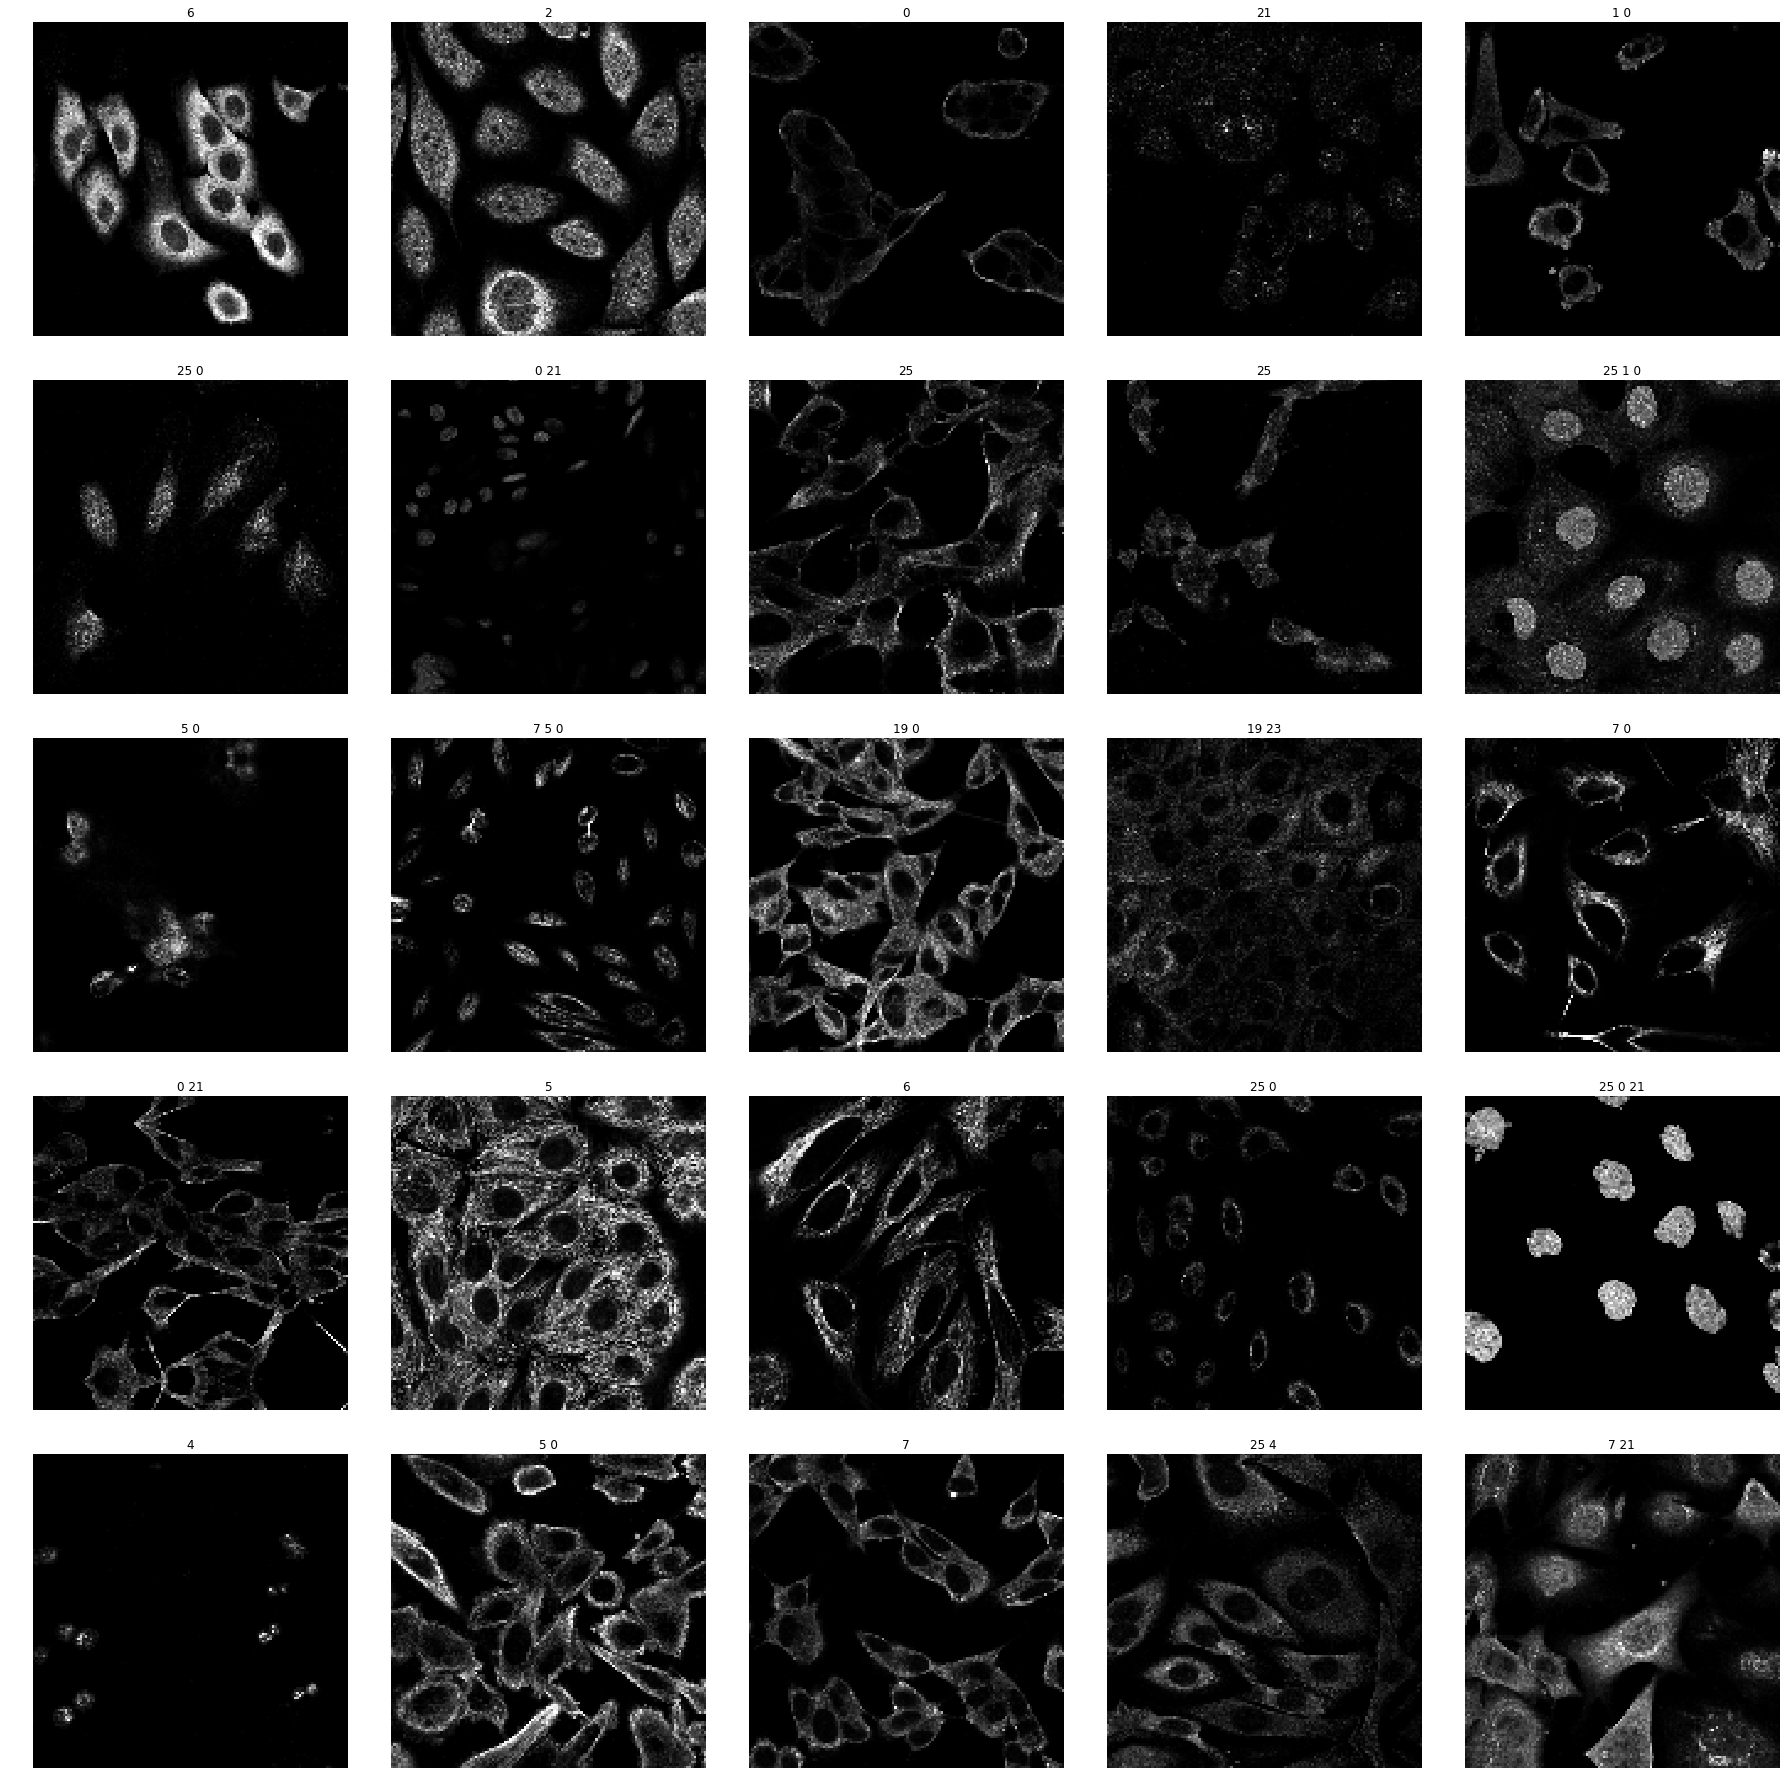

In [23]:
stage1_data.show_batch(rows=5, figsize=(25,25))